In [32]:
import pandas as pd

import pandas as pd
import numpy as np
from scipy.stats import gmean, hmean

In [33]:
df = pd.read_csv('PTP1B_LIGREF_3ROC_4corte.csv')

df

,Unnamed: 0,Chembl_ID,IC50,units,SMILES,S_MOE,pIC50,activo,S_Ledock,S_VINA,NHA,LE_MOE,LE_Ledock,LE_VINA,logP,LELP_MOE,LELP_Ledock,LELP_VINA
0,0,CHEMBL301254,1540.0,nM,O=C(OC)c1ccc(C=2c3c(C(=O)C(=O)C=2)cccc3)cc1,-5.138322,5.812479,1,-4.76,-8.6,22,0.233560,0.216364,0.390909,2.6703,11.433031,12.341723,6.831000
1,1,CHEMBL58435,10130.0,nM,Oc1c(O)cc(C(=C)C)c2c1cccc2,-5.972411,4.994391,1,-4.61,-8.0,15,0.398161,0.307333,0.533333,3.2841,8.248176,10.685792,6.157687
2,2,CHEMBL57157,610.0,nM,O=C(N(CC)CC)CCC=1C(=O)C(=O)c2c(C=1c1ccccc1)cccc2,-6.367588,6.214670,1,-4.73,-6.6,27,0.235837,0.175185,0.244444,3.9025,16.547474,22.276427,15.964773
3,3,CHEMBL292444,1010.0,nM,O=C(OCC)c1ccc(CCC=2C(=O)C(=O)c3c(C=2c2ccccc2)c...,-6.079707,5.995679,1,-5.73,-8.4,31,0.196120,0.184839,0.270968,5.0634,25.817923,27.393613,18.686357
4,4,CHEMBL60707,1130.0,nM,O=C1C(=O)C=C(c2c3c([nH]c2)cccc3)c2c1cccc2,-5.296278,5.946922,1,-5.34,-7.8,21,0.252204,0.254286,0.371429,3.3650,13.342389,13.233146,9.059615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3046,CHEMBL4447474,11000.0,nM,O=C1NC2(O)C=C1C(=O)C1C3(C)C(=C(C)C4C1C(Oc1ccc(...,-5.067535,4.958607,1,-4.09,-6.5,39,0.129937,0.104872,0.166667,5.3970,41.535576,51.462836,32.382000
3047,3047,CHEMBL5421141,11000.0,nM,O=C1c2c(O)[nH]c(O)c2Cc2ccc(OC3C4C(C)CC(C)CC4C4...,-4.530860,4.958607,1,-3.88,-7.9,39,0.116176,0.099487,0.202564,7.0534,60.713111,70.897577,34.820582
3048,3048,CHEMBL4469905,8700.0,nM,O=C1NC2(O)C3OC13C(=O)C1C3(C)C(=C(C)C4C1C(Oc1cc...,-4.950344,5.060481,1,-4.14,-6.4,40,0.123759,0.103500,0.160000,4.6082,37.235391,44.523671,28.801250
3049,3049,CHEMBL244695,6600.0,nM,O=C(O)c1cc2c(NC(C(=O)O)C3C2C=CC3)cc1,-6.411806,5.180456,1,-4.52,-7.9,19,0.337463,0.237895,0.415789,1.9232,5.698988,8.084248,4.625418


In [34]:
score_cols = ['S_MOE', 'S_Ledock', 'S_VINA']


In [35]:
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [36]:
from scipy.stats import gmean, hmean
import numpy as np
import pandas as pd

def fuse_scores_all(df, columnas, nombre_base):
    # Asegúrate de que las columnas sean numéricas
    for col in columnas:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    def fusion_func(row):
        vals = row[columnas].values.astype(float)
        abs_vals = np.abs(vals)
        signo = np.sign(np.mean(vals)) if not np.isnan(np.mean(vals)) else np.nan
        n = len(vals)
        
        min_val = np.min(vals)
        max_val = np.max(vals)
        mean_val = np.mean(vals)
        
        geo_val = gmean(abs_vals) * signo if np.all(abs_vals > 0) else np.nan
        harm_val = hmean(abs_vals) * signo if np.all(abs_vals > 0) else np.nan
        rms_val = np.sqrt(np.mean(vals**2)) * signo if not np.any(np.isnan(vals)) else np.nan
        
        return pd.Series([min_val, max_val, mean_val, geo_val, harm_val, rms_val])

    df[[f'{nombre_base}_min',
        f'{nombre_base}_max',
        f'{nombre_base}_mean',
        f'{nombre_base}_geo',
        f'{nombre_base}_harm',
        f'{nombre_base}_euclid']] = df.apply(fusion_func, axis=1)

    return df


In [37]:
df = fuse_scores_all(df, score_cols, 'S_fused')


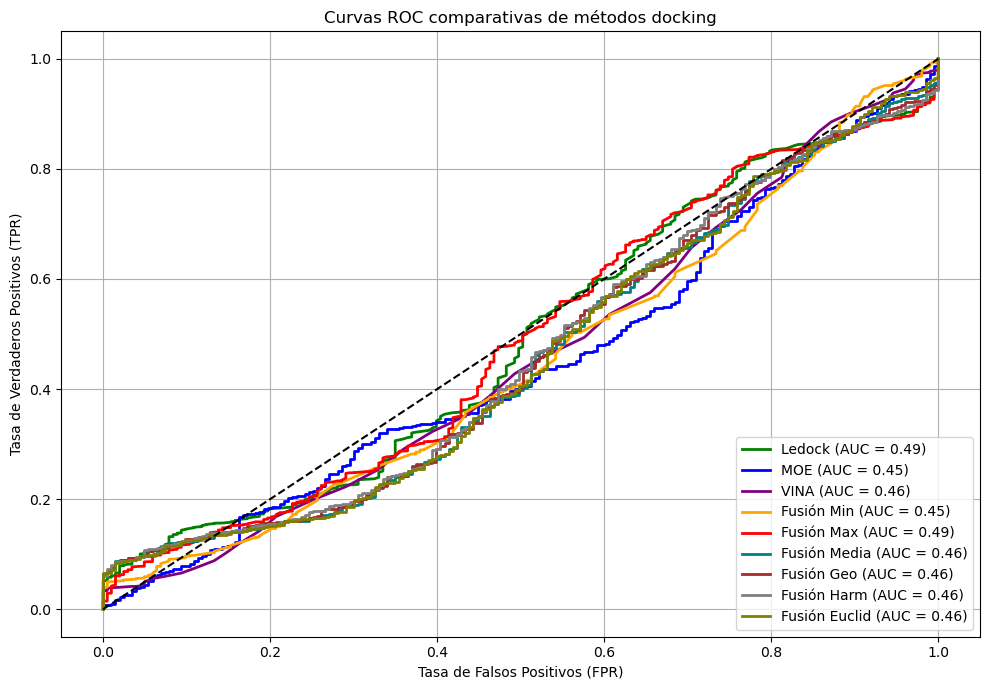

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario extendido con métodos originales + fusionados
metodos = {
    'Ledock': 'S_Ledock',
    'MOE': 'S_MOE',
    'VINA': 'S_VINA',
    'Fusión Min': 'S_fused_min',
    'Fusión Max': 'S_fused_max',
    'Fusión Media': 'S_fused_mean',
    'Fusión Geo': 'S_fused_geo',
    'Fusión Harm': 'S_fused_harm',
    'Fusión Euclid': 'S_fused_euclid'
}

y_true = df['activo']

plt.figure(figsize=(10, 7))
colores = ['green', 'blue', 'purple', 'orange', 'red', 'teal', 'brown', 'gray', 'olive']

for (nombre, columna), color in zip(metodos.items(), colores):
    if columna in df.columns:
        y_scores = -df[columna]  # docking scores: más negativo = mejor
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC comparativas de métodos docking')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
le_cols = ['LE_MOE', 'LE_Ledock', 'LE_VINA']
df = fuse_scores_all(df, le_cols, 'LE_fused')


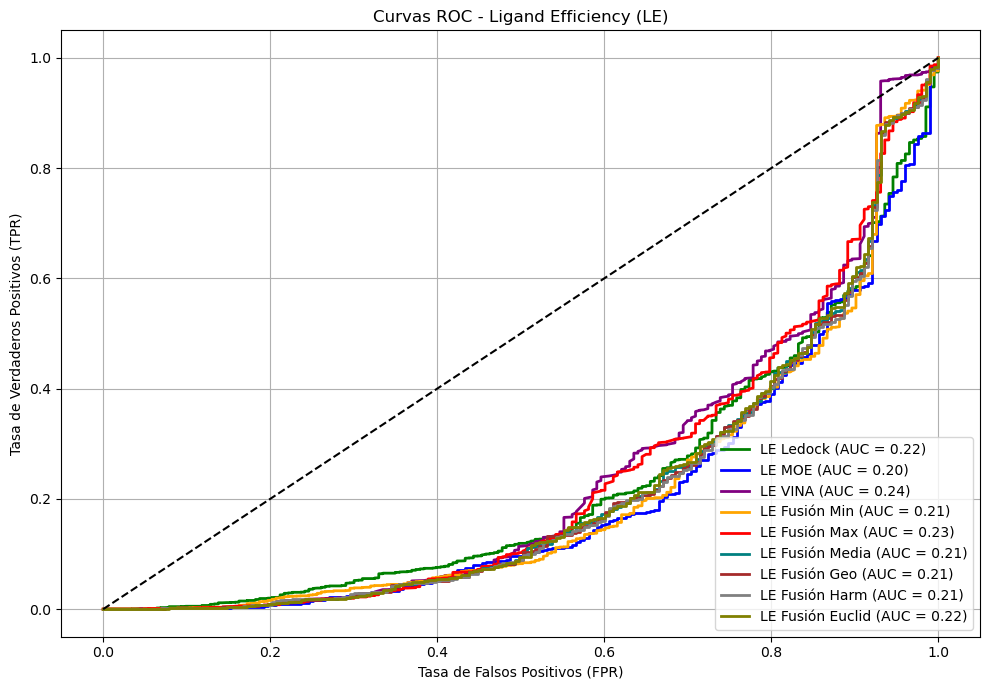

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario con métodos individuales y fusionados
metodos_le = {
    'LE Ledock': 'LE_Ledock',
    'LE MOE': 'LE_MOE',
    'LE VINA': 'LE_VINA',
    'LE Fusión Min': 'LE_fused_min',
    'LE Fusión Max': 'LE_fused_max',
    'LE Fusión Media': 'LE_fused_mean',
    'LE Fusión Geo': 'LE_fused_geo',
    'LE Fusión Harm': 'LE_fused_harm',
    'LE Fusión Euclid': 'LE_fused_euclid'
}

y_true = df['activo']

plt.figure(figsize=(10, 7))
colores = ['green', 'blue', 'purple', 'orange', 'red', 'teal', 'brown', 'gray', 'olive']

for (nombre, columna), color in zip(metodos_le.items(), colores):
    if columna in df.columns:
        y_scores =  df[columna]  # Aquí NO se invierte porque LE: más alto = mejor
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Ligand Efficiency (LE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
lelp_cols = ['LELP_MOE', 'LELP_Ledock', 'LELP_VINA']
df = fuse_scores_all(df, lelp_cols, 'LELP_fused')


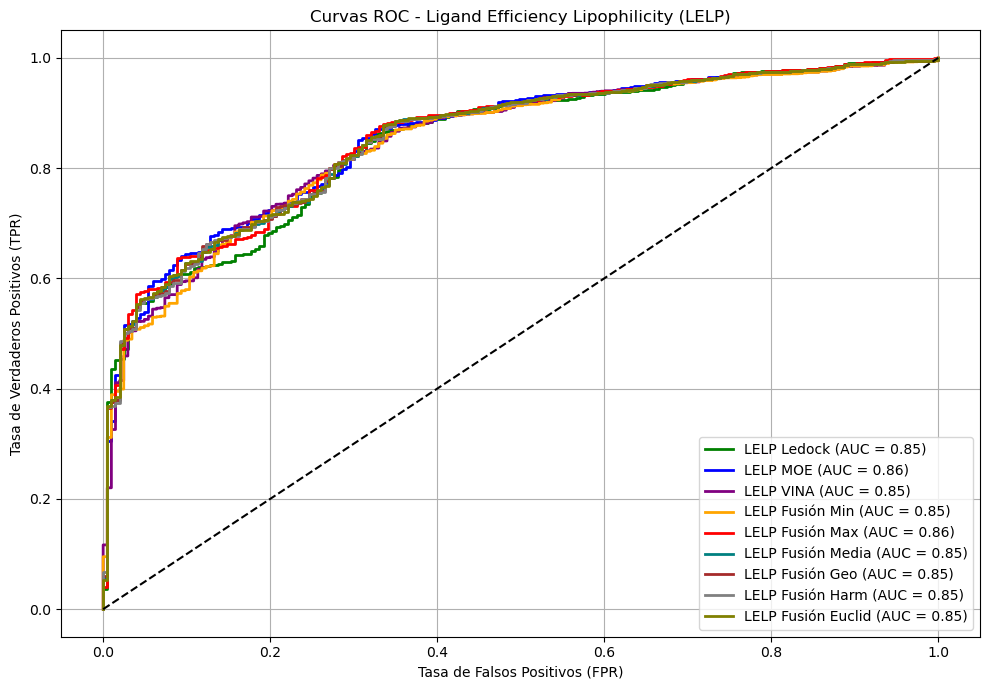

In [31]:
metodos_lelp = {
    'LELP Ledock': 'LELP_Ledock',
    'LELP MOE': 'LELP_MOE',
    'LELP VINA': 'LELP_VINA',
    'LELP Fusión Min': 'LELP_fused_min',
    'LELP Fusión Max': 'LELP_fused_max',
    'LELP Fusión Media': 'LELP_fused_mean',
    'LELP Fusión Geo': 'LELP_fused_geo',
    'LELP Fusión Harm': 'LELP_fused_harm',
    'LELP Fusión Euclid': 'LELP_fused_euclid'
}

plt.figure(figsize=(10, 7))

for (nombre, columna), color in zip(metodos_lelp.items(), colores):
    if columna in df.columns:
        y_scores = df[columna]  # Más alto = mejor para LELP
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Ligand Efficiency Lipophilicity (LELP)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
fusionados = {
    # Scores individuales
    'S_MOE': 'S_MOE',
    'S_Ledock': 'S_Ledock',
    'S_VINA': 'S_VINA',
    
    # Scores fusionados
    'S_fused_min': 'S_min',
    'S_fused_max': 'S_max',
    'S_fused_mean': 'S_mean',
    'S_fused_geo': 'S_geo',
    'S_fused_harm': 'S_harm',
    'S_fused_euclid': 'S_euclid',
    
    # Ligand Efficiency individual
    'LE_MOE': 'LE_MOE',
    'LE_Ledock': 'LE_Ledock',
    'LE_VINA': 'LE_VINA',
    
    # Ligand Efficiency fusionada
    'LE_fused_min': 'LE_min',
    'LE_fused_max': 'LE_max',
    'LE_fused_mean': 'LE_mean',
    'LE_fused_geo': 'LE_geo',
    'LE_fused_harm': 'LE_harm',
    'LE_fused_euclid': 'LE_euclid',
    
    # LELP individual
    'LELP_MOE': 'LELP_MOE',
    'LELP_Ledock': 'LELP_Ledock',
    'LELP_VINA': 'LELP_VINA',
    
    # LELP fusionado
    'LELP_fused_min': 'LELP_min',
    'LELP_fused_max': 'LELP_max',
    'LELP_fused_mean': 'LELP_mean',
    'LELP_fused_geo': 'LELP_geo',
    'LELP_fused_harm': 'LELP_harm',
    'LELP_fused_euclid': 'LELP_euclid',
}


In [23]:
auc_results = []

y_true = df['activo']

for col, label in fusionados.items():
    if col in df.columns:
        try:
            scores = -df[col]  # invertir si el score es docking (menor es mejor)
            auc_val = roc_auc_score(y_true, scores)
            auc_results.append((label, auc_val))
        except:
            auc_results.append((label, 'Error'))


In [24]:
import pandas as pd

auc_df = pd.DataFrame(auc_results, columns=['Métrica Fusionada', 'AUC'])
auc_df = auc_df.sort_values('AUC', ascending=False)
print(auc_df)


   Métrica Fusionada       AUC
9             LE_MOE  0.800275
12            LE_min  0.790806
16           LE_harm  0.787702
15            LE_geo  0.786631
14           LE_mean  0.785483
17         LE_euclid  0.784228
10         LE_Ledock  0.777044
13            LE_max  0.766780
11           LE_VINA  0.759623
1           S_Ledock  0.488046
4              S_max  0.487111
7             S_harm  0.461816
6              S_geo  0.458483
2             S_VINA  0.456618
8           S_euclid  0.456082
5             S_mean  0.455509
3              S_min  0.450682
0              S_MOE  0.450294
21          LELP_min  0.153274
19       LELP_Ledock  0.152208
20         LELP_VINA  0.151039
25         LELP_harm  0.146668
23         LELP_mean  0.146559
24          LELP_geo  0.146223
26       LELP_euclid  0.146028
22          LELP_max  0.144333
18          LELP_MOE  0.143680


In [26]:
import pandas as pd

# Creamos el DataFrame
auc_df = pd.DataFrame(auc_results, columns=['Métrica', 'AUC'])

# Clasificamos cada métrica según su tipo
def clasificar_tipo(met):
    if 'LELP' in met:
        return 'LELP'
    elif 'LE' in met:
        return 'LE'
    else:
        return 'S'

auc_df['Tipo'] = auc_df['Métrica'].apply(clasificar_tipo)


In [27]:
# Quitamos el prefijo común para que quede solo 'min', 'max', etc.
auc_df['Método'] = auc_df['Métrica'].str.extract(r'_(min|max|mean|geo|harm|euclid|MOE|Ledock|VINA)')[0]

# Creamos una tabla pivotada
auc_pivot = auc_df.pivot(index='Método', columns='Tipo', values='AUC')
auc_pivot = auc_pivot[['S', 'LE', 'LELP']]  # orden deseado


In [28]:
auc_pivot

Tipo,S,LE,LELP
Método,,,
Ledock,0.488046,0.777044,0.152208
MOE,0.450294,0.800275,0.143680
VINA,0.456618,0.759623,0.151039
euclid,0.456082,0.784228,0.146028
geo,0.458483,0.786631,0.146223
harm,0.461816,0.787702,0.146668
max,0.487111,0.766780,0.144333
mean,0.455509,0.785483,0.146559
min,0.450682,0.790806,0.153274


In [32]:
df

,Unnamed: 0,Chembl_ID,IC50,units,SMILES,S_MOE,pIC50,activo,S_Ledock,S_VINA,...,LE_fused_mean,LE_fused_geo,LE_fused_harm,LE_fused_euclid,LELP_fused_min,LELP_fused_max,LELP_fused_mean,LELP_fused_geo,LELP_fused_harm,LELP_fused_euclid
0,0,CHEMBL301254,1540.0,nM,O=C(OC)c1ccc(C=2c3c(C(=O)C(=O)C=2)cccc3)cc1,-5.138322,5.812479,1,-4.76,-8.6,...,0.280278,0.270325,0.261745,0.291075,6.831000,12.341723,10.201918,9.878109,9.527340,10.483239
1,1,CHEMBL58435,10130.0,nM,Oc1c(O)cc(C(=C)C)c2c1cccc2,-5.972411,4.994391,1,-4.61,-8.0,...,0.412942,0.402614,0.392652,0.423253,6.157687,10.685792,8.363885,8.156943,7.952924,8.566128
2,2,CHEMBL57157,610.0,nM,O=C(N(CC)CC)CCC=1C(=O)C(=O)c2c(C=1c1ccccc1)cccc2,-6.367588,6.214670,1,-4.73,-6.6,...,0.218489,0.216154,0.213685,0.220652,15.964773,22.276427,18.262891,18.054273,17.861332,18.483615
3,3,CHEMBL292444,1010.0,nM,O=C(OCC)c1ccc(CCC=2C(=O)C(=O)c3c(C=2c2ccccc2)c...,-6.079707,5.995679,1,-5.73,-8.4,...,0.217309,0.214163,0.211275,0.220644,18.686357,27.393613,23.965964,23.642773,23.300496,24.263519
4,4,CHEMBL60707,1130.0,nM,O=C1C(=O)C=C(c2c3c([nH]c2)cccc3)c2c1cccc2,-5.296278,5.946922,1,-5.34,-7.8,...,0.292639,0.287729,0.283288,0.297897,9.059615,13.342389,11.878383,11.695052,11.498796,12.044530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3046,CHEMBL4447474,11000.0,nM,O=C1NC2(O)C=C1C(=O)C1C3(C)C(=C(C)C4C1C(Oc1ccc(...,-5.067535,4.958607,1,-4.09,-6.5,...,0.133825,0.131446,0.129135,0.136210,32.382000,51.462836,41.793471,41.058764,40.328761,42.513611
3047,3047,CHEMBL5421141,11000.0,nM,O=C1c2c(O)[nH]c(O)c2Cc2ccc(OC3C4C(C)CC(C)CC4C4...,-4.530860,4.958607,1,-3.88,-7.9,...,0.139409,0.132785,0.127141,0.146546,34.820582,70.897577,55.477090,53.119010,50.594990,57.518175
3048,3048,CHEMBL4469905,8700.0,nM,O=C1NC2(O)C3OC13C(=O)C1C3(C)C(=C(C)C4C1C(Oc1cc...,-4.950344,5.060481,1,-4.14,-6.4,...,0.129086,0.127022,0.125041,0.131185,28.801250,44.523671,36.853438,36.278786,35.698626,37.409195
3049,3049,CHEMBL244695,6600.0,nM,O=C(O)c1cc2c(NC(C(=O)O)C3C2C=CC3)cc1,-6.411806,5.180456,1,-4.52,-7.9,...,0.330383,0.321980,0.313418,0.338308,4.625418,8.084248,6.136218,5.973049,5.821131,6.304179


S_MOE:        ρ = -0.28,     p = 0.0000
LE_MOE:       ρ = -0.27,    p = 0.0000
LELP_MOE:     ρ = 0.34,  p = 0.0000
LELP_MOE_mean:ρ = -0.18, p = 0.0000


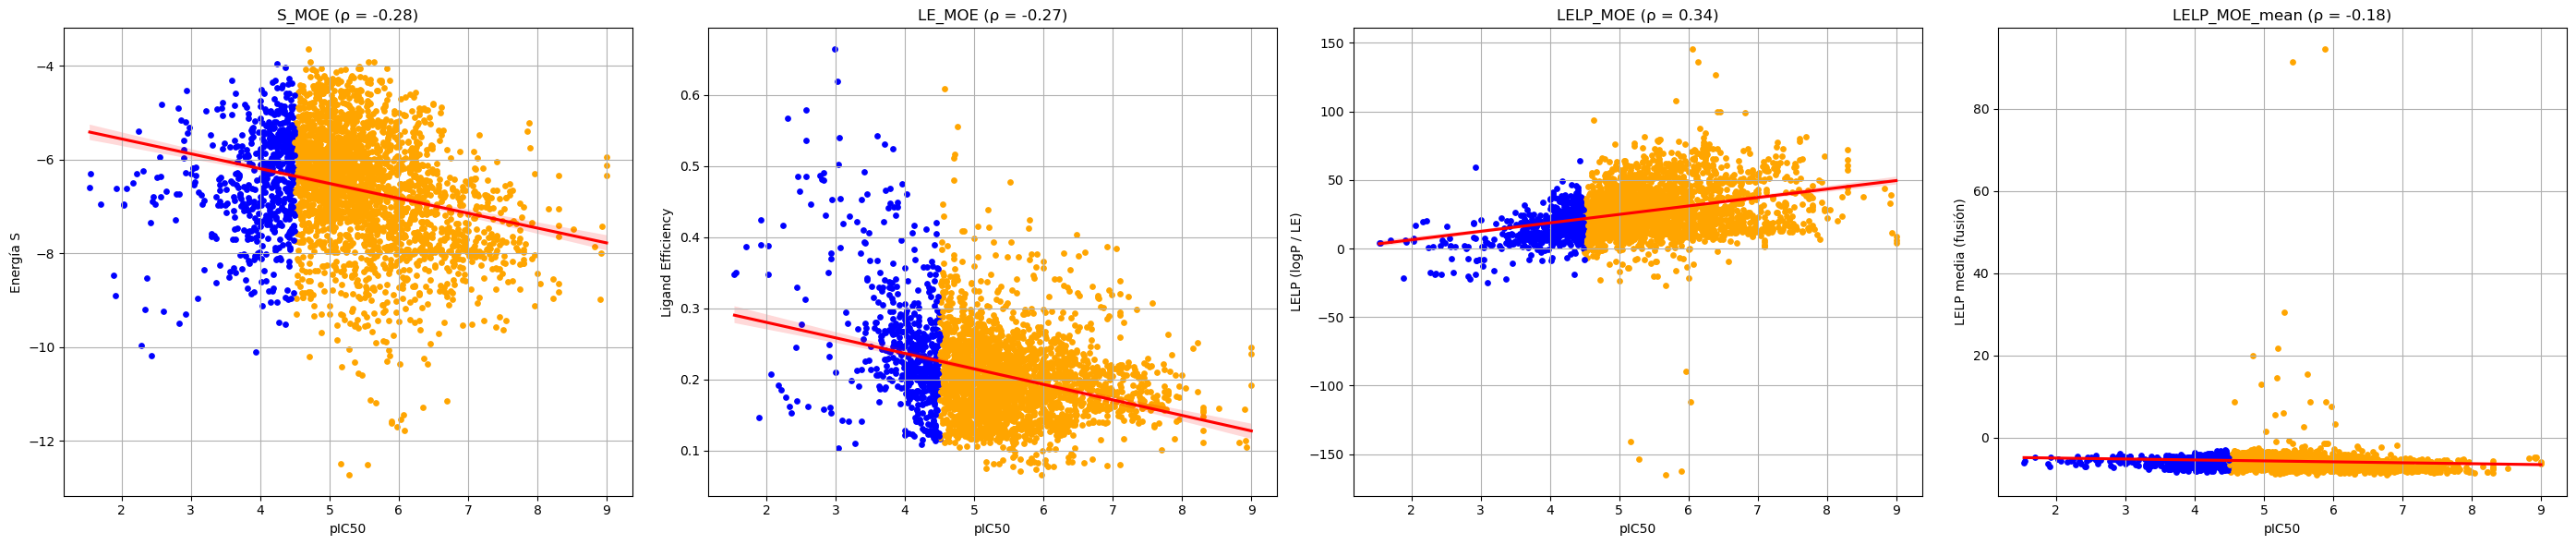

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Asegúrate de que estas columnas existan en tu df_spearman
pIC50 = df['pIC50']
S = df['S_MOE']
LE = df['LE_MOE']
LELP = df['LELP_MOE']
LELP_mean = df['S_fused_max']  # Esta es la nueva métrica fusionada

# Calcular correlaciones de Spearman
rho_S, p_S = spearmanr(pIC50, S)
rho_LE, p_LE = spearmanr(pIC50, LE)
rho_LELP, p_LELP = spearmanr(pIC50, LELP)
rho_LELPmean, p_LELPmean = spearmanr(pIC50, LELP_mean)

# Mostrar coeficientes
print(f"S_MOE:        ρ = {rho_S:.2f},     p = {p_S:.4f}")
print(f"LE_MOE:       ρ = {rho_LE:.2f},    p = {p_LE:.4f}")
print(f"LELP_MOE:     ρ = {rho_LELP:.2f},  p = {p_LELP:.4f}")
print(f"LELP_MOE_mean:ρ = {rho_LELPmean:.2f}, p = {p_LELPmean:.4f}")

# Colores según umbral pIC50
colores = ["orange" if x >= 4.5 else "blue" for x in pIC50]

# Crear figura con 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(28, 6))

# --- Gráfico S_MOE ---
for i in range(len(pIC50)):
    axes[0].scatter(pIC50[i], S[i], color=colores[i], s=15)
sns.regplot(x=pIC50, y=S, scatter=False, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title(f"S_MOE (ρ = {rho_S:.2f})")
axes[0].set_xlabel("pIC50")
axes[0].set_ylabel("Energía S")
axes[0].grid(True)

# --- Gráfico LE_MOE ---
for i in range(len(pIC50)):
    axes[1].scatter(pIC50[i], LE[i], color=colores[i], s=15)
sns.regplot(x=pIC50, y=LE, scatter=False, line_kws={"color": "red"}, ax=axes[1])
axes[1].set_title(f"LE_MOE (ρ = {rho_LE:.2f})")
axes[1].set_xlabel("pIC50")
axes[1].set_ylabel("Ligand Efficiency")
axes[1].grid(True)

# --- Gráfico LELP_MOE ---
for i in range(len(pIC50)):
    axes[2].scatter(pIC50[i], LELP[i], color=colores[i], s=15)
sns.regplot(x=pIC50, y=LELP, scatter=False, line_kws={"color": "red"}, ax=axes[2])
axes[2].set_title(f"LELP_MOE (ρ = {rho_LELP:.2f})")
axes[2].set_xlabel("pIC50")
axes[2].set_ylabel("LELP (logP / LE)")
axes[2].grid(True)

# --- Gráfico LELP_MOE_mean (fusión) ---
for i in range(len(pIC50)):
    axes[3].scatter(pIC50[i], LELP_mean[i], color=colores[i], s=15)
sns.regplot(x=pIC50, y=LELP_mean, scatter=False, line_kws={"color": "red"}, ax=axes[3])
axes[3].set_title(f"LELP_MOE_mean (ρ = {rho_LELPmean:.2f})")
axes[3].set_xlabel("pIC50")
axes[3].set_ylabel("LELP media (fusión)")
axes[3].grid(True)

# Ajustar espacios
plt.tight_layout()
plt.show()


KeyError: 'S_Vina'

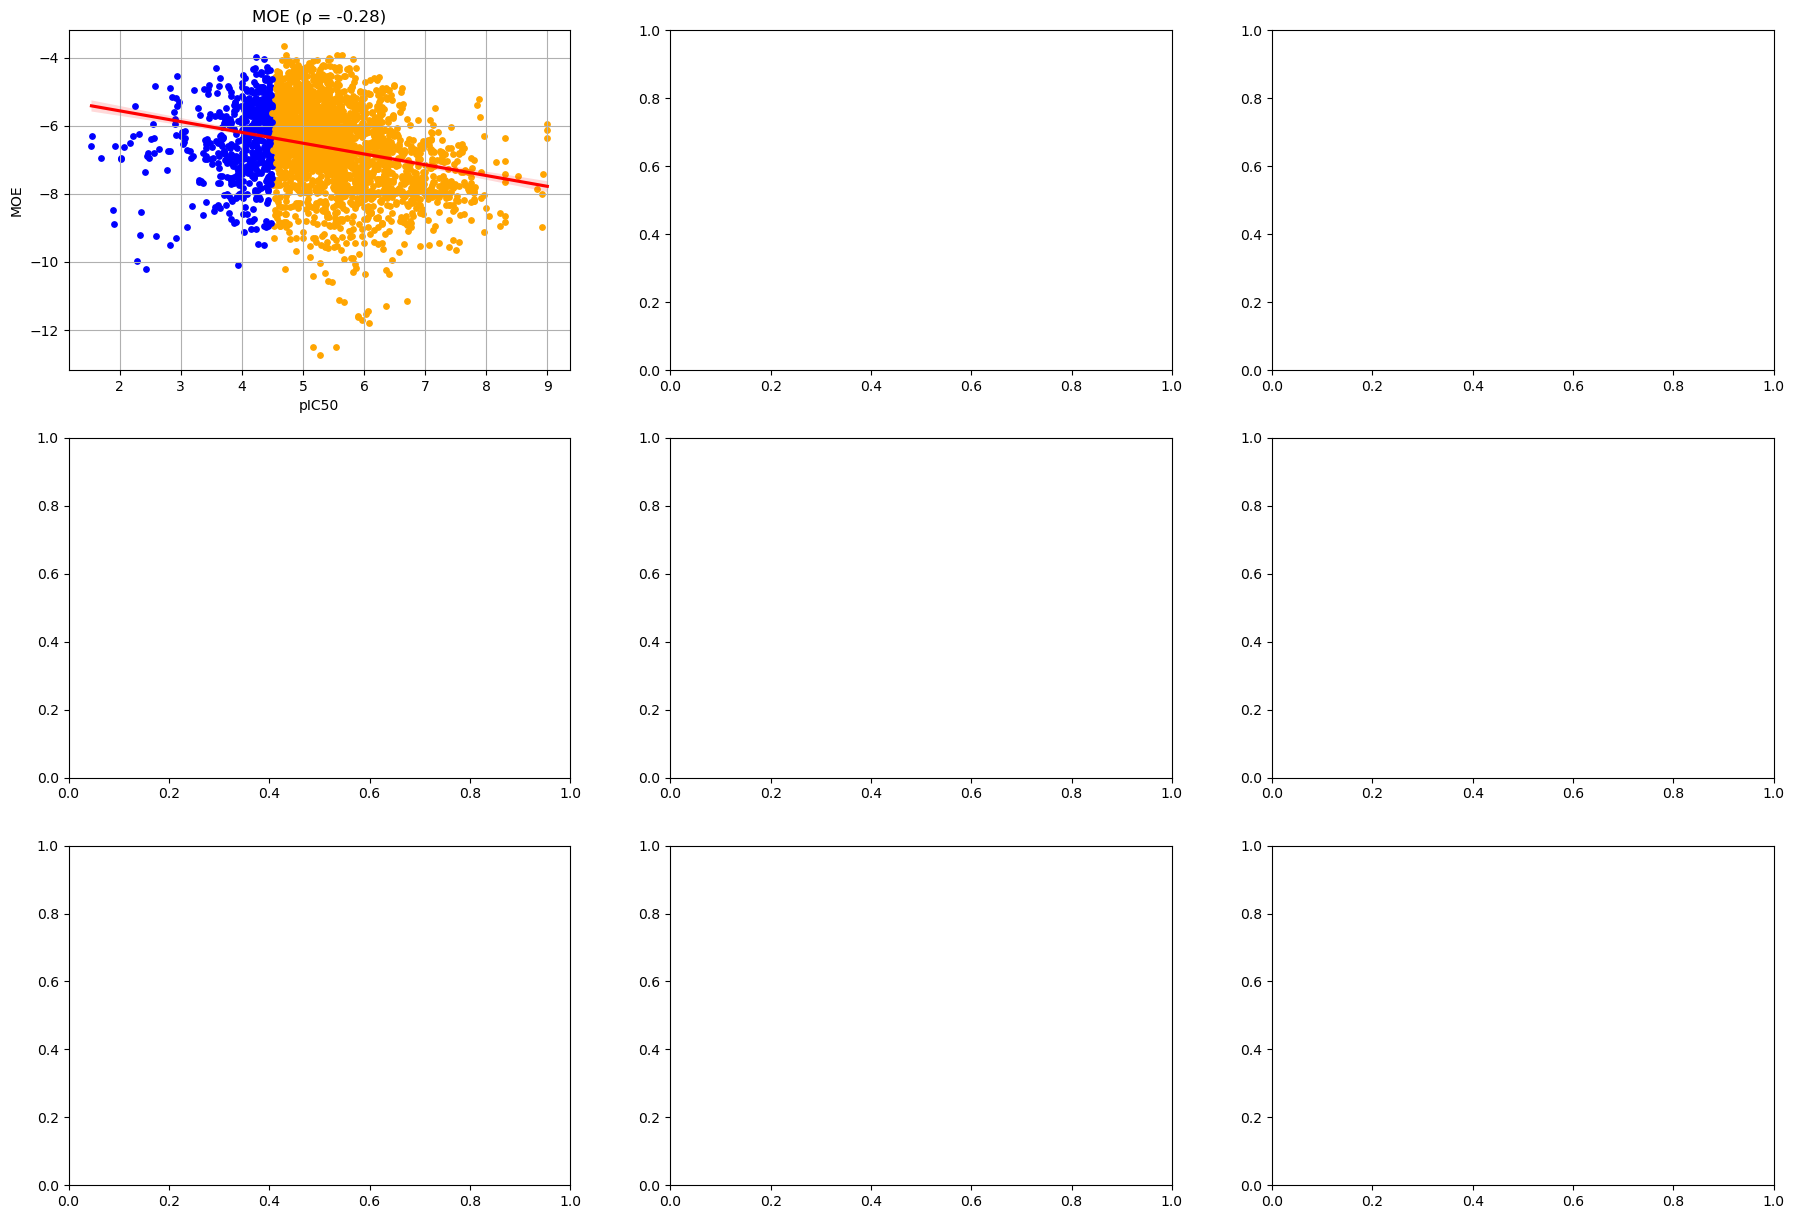

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Asegúrate de que el DataFrame principal sea 'df'
pIC50 = df['pIC50']

# Definir los métodos a analizar
metodos = {
    'S_MOE': 'MOE',
    'S_Vina': 'Vina',
    'S_Ledock': 'Ledock',
    'S_fused_min': 'Fusión Mínimo',
    'S_fused_max': 'Fusión Máximo',
    'S_fused_mean': 'Fusión Media',
    'S_fused_geo': 'Fusión Geométrica',
    'S_fused_harm': 'Fusión Armónica',
    'S_fused_euclid': 'Fusión Euclidiana'
}

# Colores para los puntos según pIC50
colores = ["orange" if x >= 4.5 else "blue" for x in pIC50]

# Crear subplots (3 filas x 3 columnas)
fig, axes = plt.subplots(3, 3, figsize=(22, 15))
axes = axes.flatten()  # Para acceder con índice simple

# Recorrer cada métrica
for i, (columna, nombre) in enumerate(metodos.items()):
    y = df[columna]
    rho, pval = spearmanr(pIC50, y)
    
    # Graficar puntos coloreados
    for j in range(len(pIC50)):
        axes[i].scatter(pIC50[j], y[j], color=colores[j], s=15)
    
    # Línea de regresión
    sns.regplot(x=pIC50, y=y, scatter=False, line_kws={"color": "red"}, ax=axes[i])
    
    # Etiquetas
    axes[i].set_title(f"{nombre} (ρ = {rho:.2f})")
    axes[i].set_xlabel("pIC50")
    axes[i].set_ylabel(nombre)
    axes[i].grid(True)

# Eliminar ejes sobrantes si hay menos de 9
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()


In [39]:
metodos = {
    # Scores individuales
    'S_MOE': 'S_MOE',
    'S_Ledock': 'S_Ledock',
    'S_VINA': 'S_VINA',
    
    # Scores fusionados
    'S_fused_min': 'S_min',
    'S_fused_max': 'S_max',
    'S_fused_mean': 'S_mean',
    'S_fused_geo': 'S_geo',
    'S_fused_harm': 'S_harm',
    'S_fused_euclid': 'S_euclid',
    
    # Ligand Efficiency individual
    'LE_MOE': 'LE_MOE',
    'LE_Ledock': 'LE_Ledock',
    'LE_VINA': 'LE_VINA',
    
    # Ligand Efficiency fusionada
    'LE_fused_min': 'LE_min',
    'LE_fused_max': 'LE_max',
    'LE_fused_mean': 'LE_mean',
    'LE_fused_geo': 'LE_geo',
    'LE_fused_harm': 'LE_harm',
    'LE_fused_euclid': 'LE_euclid',
    
    # LELP individual
    'LELP_MOE': 'LELP_MOE',
    'LELP_Ledock': 'LELP_Ledock',
    'LELP_VINA': 'LELP_VINA',
    
    # LELP fusionado
    'LELP_fused_min': 'LELP_min',
    'LELP_fused_max': 'LELP_max',
    'LELP_fused_mean': 'LELP_mean',
    'LELP_fused_geo': 'LELP_geo',
    'LELP_fused_harm': 'LELP_harm',
    'LELP_fused_euclid': 'LELP_euclid',
}


In [40]:
from scipy.stats import spearmanr
import pandas as pd

# Lista de columnas y nombres legibles


# Lista para guardar resultados
resultados = []

# Calcular Spearman para cada columna
for columna, nombre in metodos.items():
    rho, pval = spearmanr(df['pIC50'], df[columna])
    resultados.append({
        'Métrica': nombre,
        'Spearman ρ': round(rho, 3),
        'p-valor': round(pval, 4)
    })

# Convertir a DataFrame y mostrar
tabla_spearman = pd.DataFrame(resultados)
print(tabla_spearman)


        Métrica  Spearman ρ  p-valor
0         S_MOE      -0.275      0.0
1      S_Ledock      -0.175      0.0
2        S_VINA      -0.125      0.0
3         S_min      -0.207      0.0
4         S_max      -0.177      0.0
5        S_mean      -0.220      0.0
6         S_geo      -0.217      0.0
7        S_harm      -0.215      0.0
8      S_euclid      -0.231      0.0
9        LE_MOE      -0.269      0.0
10    LE_Ledock      -0.208      0.0
11      LE_VINA      -0.277      0.0
12       LE_min      -0.272      0.0
13       LE_max      -0.272      0.0
14      LE_mean      -0.261      0.0
15       LE_geo      -0.261      0.0
16      LE_harm      -0.260      0.0
17    LE_euclid      -0.263      0.0
18     LELP_MOE       0.337      0.0
19  LELP_Ledock       0.319      0.0
20    LELP_VINA       0.360      0.0
21     LELP_min       0.348      0.0
22     LELP_max       0.345      0.0
23    LELP_mean       0.341      0.0
24     LELP_geo       0.342      0.0
25    LELP_harm       0.341      0.0
2

In [37]:
df

,Unnamed: 0,Chembl_ID,IC50,units,SMILES,S_MOE,pIC50,activo,S_Ledock,S_VINA,...,LE_fused_mean,LE_fused_geo,LE_fused_harm,LE_fused_euclid,LELP_fused_min,LELP_fused_max,LELP_fused_mean,LELP_fused_geo,LELP_fused_harm,LELP_fused_euclid
0,0,CHEMBL301254,1540.0,nM,O=C(OC)c1ccc(C=2c3c(C(=O)C(=O)C=2)cccc3)cc1,-5.138322,5.812479,1,-4.76,-8.6,...,0.280278,0.270325,0.261745,0.291075,6.831000,12.341723,10.201918,9.878109,9.527340,10.483239
1,1,CHEMBL58435,10130.0,nM,Oc1c(O)cc(C(=C)C)c2c1cccc2,-5.972411,4.994391,1,-4.61,-8.0,...,0.412942,0.402614,0.392652,0.423253,6.157687,10.685792,8.363885,8.156943,7.952924,8.566128
2,2,CHEMBL57157,610.0,nM,O=C(N(CC)CC)CCC=1C(=O)C(=O)c2c(C=1c1ccccc1)cccc2,-6.367588,6.214670,1,-4.73,-6.6,...,0.218489,0.216154,0.213685,0.220652,15.964773,22.276427,18.262891,18.054273,17.861332,18.483615
3,3,CHEMBL292444,1010.0,nM,O=C(OCC)c1ccc(CCC=2C(=O)C(=O)c3c(C=2c2ccccc2)c...,-6.079707,5.995679,1,-5.73,-8.4,...,0.217309,0.214163,0.211275,0.220644,18.686357,27.393613,23.965964,23.642773,23.300496,24.263519
4,4,CHEMBL60707,1130.0,nM,O=C1C(=O)C=C(c2c3c([nH]c2)cccc3)c2c1cccc2,-5.296278,5.946922,1,-5.34,-7.8,...,0.292639,0.287729,0.283288,0.297897,9.059615,13.342389,11.878383,11.695052,11.498796,12.044530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3046,CHEMBL4447474,11000.0,nM,O=C1NC2(O)C=C1C(=O)C1C3(C)C(=C(C)C4C1C(Oc1ccc(...,-5.067535,4.958607,1,-4.09,-6.5,...,0.133825,0.131446,0.129135,0.136210,32.382000,51.462836,41.793471,41.058764,40.328761,42.513611
3047,3047,CHEMBL5421141,11000.0,nM,O=C1c2c(O)[nH]c(O)c2Cc2ccc(OC3C4C(C)CC(C)CC4C4...,-4.530860,4.958607,1,-3.88,-7.9,...,0.139409,0.132785,0.127141,0.146546,34.820582,70.897577,55.477090,53.119010,50.594990,57.518175
3048,3048,CHEMBL4469905,8700.0,nM,O=C1NC2(O)C3OC13C(=O)C1C3(C)C(=C(C)C4C1C(Oc1cc...,-4.950344,5.060481,1,-4.14,-6.4,...,0.129086,0.127022,0.125041,0.131185,28.801250,44.523671,36.853438,36.278786,35.698626,37.409195
3049,3049,CHEMBL244695,6600.0,nM,O=C(O)c1cc2c(NC(C(=O)O)C3C2C=CC3)cc1,-6.411806,5.180456,1,-4.52,-7.9,...,0.330383,0.321980,0.313418,0.338308,4.625418,8.084248,6.136218,5.973049,5.821131,6.304179


In [41]:
df

,Unnamed: 0,Chembl_ID,IC50,units,SMILES,S_MOE,pIC50,activo,S_Ledock,S_VINA,...,LE_fused_mean,LE_fused_geo,LE_fused_harm,LE_fused_euclid,LELP_fused_min,LELP_fused_max,LELP_fused_mean,LELP_fused_geo,LELP_fused_harm,LELP_fused_euclid
0,0,CHEMBL301254,1540.0,nM,O=C(OC)c1ccc(C=2c3c(C(=O)C(=O)C=2)cccc3)cc1,-5.138322,5.812479,1,-4.76,-8.6,...,0.280278,0.270325,0.261745,0.291075,6.831000,12.341723,10.201918,9.878109,9.527340,10.483239
1,1,CHEMBL58435,10130.0,nM,Oc1c(O)cc(C(=C)C)c2c1cccc2,-5.972411,4.994391,1,-4.61,-8.0,...,0.412942,0.402614,0.392652,0.423253,6.157687,10.685792,8.363885,8.156943,7.952924,8.566128
2,2,CHEMBL57157,610.0,nM,O=C(N(CC)CC)CCC=1C(=O)C(=O)c2c(C=1c1ccccc1)cccc2,-6.367588,6.214670,1,-4.73,-6.6,...,0.218489,0.216154,0.213685,0.220652,15.964773,22.276427,18.262891,18.054273,17.861332,18.483615
3,3,CHEMBL292444,1010.0,nM,O=C(OCC)c1ccc(CCC=2C(=O)C(=O)c3c(C=2c2ccccc2)c...,-6.079707,5.995679,1,-5.73,-8.4,...,0.217309,0.214163,0.211275,0.220644,18.686357,27.393613,23.965964,23.642773,23.300496,24.263519
4,4,CHEMBL60707,1130.0,nM,O=C1C(=O)C=C(c2c3c([nH]c2)cccc3)c2c1cccc2,-5.296278,5.946922,1,-5.34,-7.8,...,0.292639,0.287729,0.283288,0.297897,9.059615,13.342389,11.878383,11.695052,11.498796,12.044530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3046,CHEMBL4447474,11000.0,nM,O=C1NC2(O)C=C1C(=O)C1C3(C)C(=C(C)C4C1C(Oc1ccc(...,-5.067535,4.958607,1,-4.09,-6.5,...,0.133825,0.131446,0.129135,0.136210,32.382000,51.462836,41.793471,41.058764,40.328761,42.513611
3047,3047,CHEMBL5421141,11000.0,nM,O=C1c2c(O)[nH]c(O)c2Cc2ccc(OC3C4C(C)CC(C)CC4C4...,-4.530860,4.958607,1,-3.88,-7.9,...,0.139409,0.132785,0.127141,0.146546,34.820582,70.897577,55.477090,53.119010,50.594990,57.518175
3048,3048,CHEMBL4469905,8700.0,nM,O=C1NC2(O)C3OC13C(=O)C1C3(C)C(=C(C)C4C1C(Oc1cc...,-4.950344,5.060481,1,-4.14,-6.4,...,0.129086,0.127022,0.125041,0.131185,28.801250,44.523671,36.853438,36.278786,35.698626,37.409195
3049,3049,CHEMBL244695,6600.0,nM,O=C(O)c1cc2c(NC(C(=O)O)C3C2C=CC3)cc1,-6.411806,5.180456,1,-4.52,-7.9,...,0.330383,0.321980,0.313418,0.338308,4.625418,8.084248,6.136218,5.973049,5.821131,6.304179


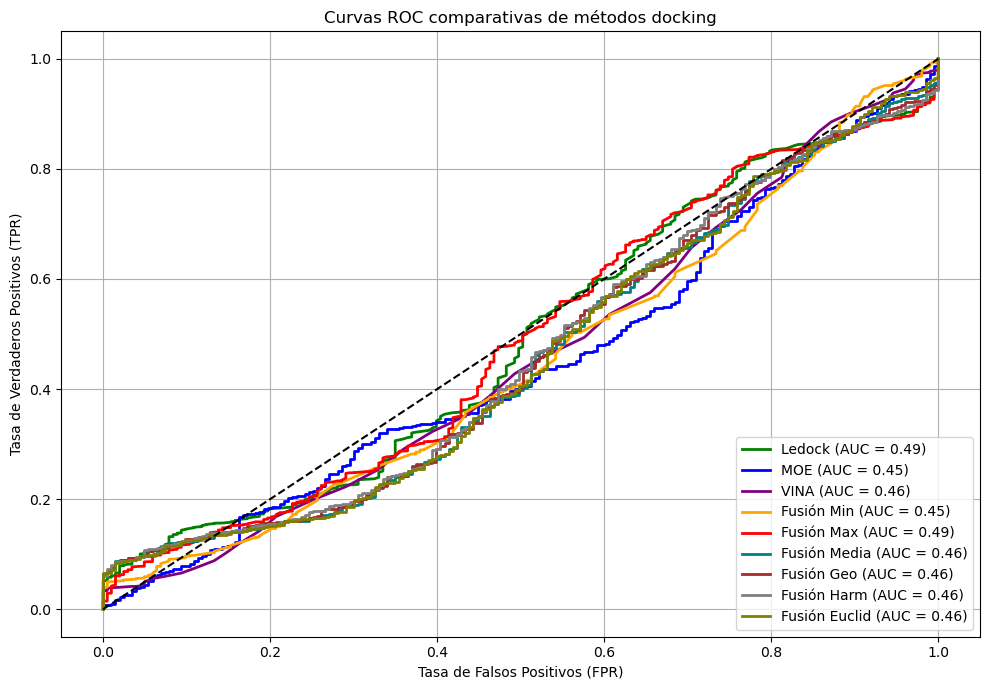

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario extendido con métodos originales + fusionados
metodos = {
    'Ledock': 'S_Ledock',
    'MOE': 'S_MOE',
    'VINA': 'S_VINA',
    'Fusión Min': 'S_fused_min',
    'Fusión Max': 'S_fused_max',
    'Fusión Media': 'S_fused_mean',
    'Fusión Geo': 'S_fused_geo',
    'Fusión Harm': 'S_fused_harm',
    'Fusión Euclid': 'S_fused_euclid'
}

y_true = df['activo']

plt.figure(figsize=(10, 7))
colores = ['green', 'blue', 'purple', 'orange', 'red', 'teal', 'brown', 'gray', 'olive']

for (nombre, columna), color in zip(metodos.items(), colores):
    if columna in df.columns:
        y_scores = -df[columna]  # docking scores: más negativo = mejor
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC comparativas de métodos docking')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


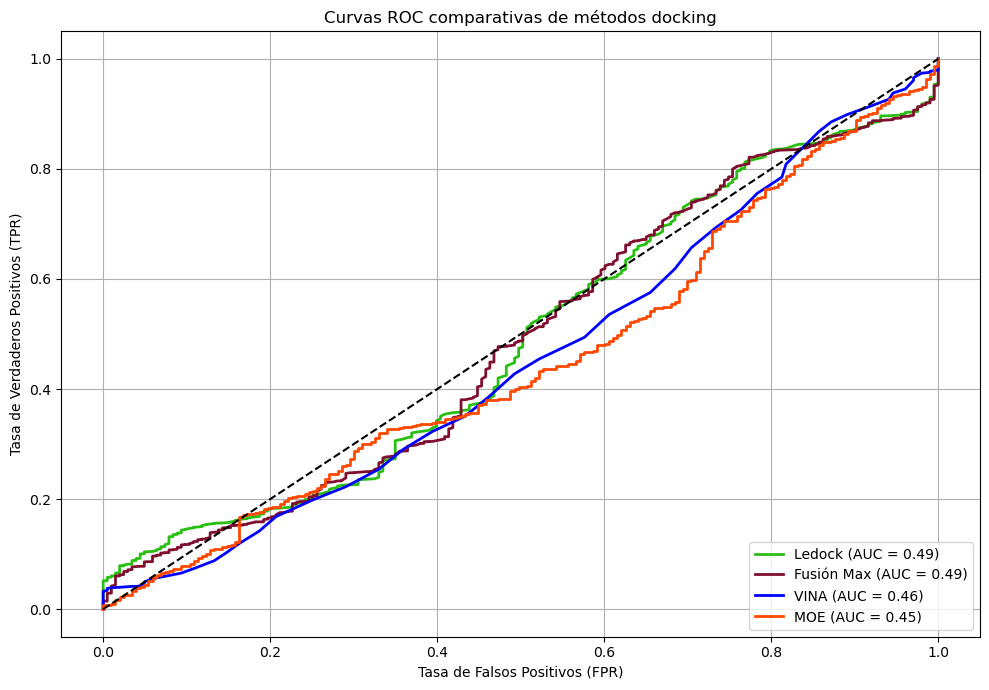

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario extendido con métodos originales + fusionados
metodos = {
    'Ledock': 'S_Ledock',
    'Fusión Max': 'S_fused_max',
    'VINA': 'S_VINA',
    'MOE': 'S_MOE',
}

y_true = df['activo']

plt.figure(figsize=(10, 7))
colores = ['#29bf12', '#800F2F', '#0000FF',  '#ff4800', 'red', 'teal', 'brown', 'gray', 'olive']

for (nombre, columna), color in zip(metodos.items(), colores):
    if columna in df.columns:
        y_scores = -df[columna]  # docking scores: más negativo = mejor
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC comparativas de métodos docking')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


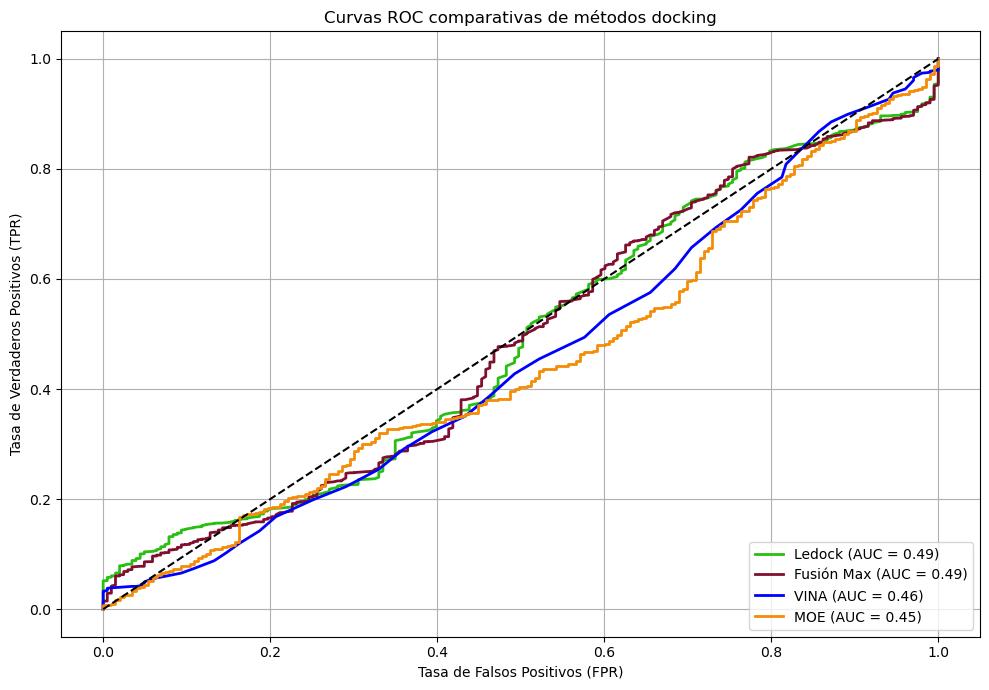

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Diccionario extendido con métodos originales + fusionados
metodos = {
    'Ledock': 'S_Ledock',
    'Fusión Max': 'S_fused_max',
    'VINA': 'S_VINA',
    'MOE': 'S_MOE',
}

y_true = df['activo']

plt.figure(figsize=(10, 7))
colores = ['#29bf12', '#800F2F', '#0000FF',  '#f48c06', 'red', 'teal', 'brown', 'gray', 'olive']

for (nombre, columna), color in zip(metodos.items(), colores):
    if columna in df.columns:
        y_scores = -df[columna]  # docking scores: más negativo = mejor
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=color, label=f'{nombre} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC comparativas de métodos docking')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
